In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [40]:
# Load Dataset
dataset = pd.read_csv("riceclass.csv")
print(dataset)

        id  Area Integer  Perimeter Real  Major_Axis_Length Real  \
0        1         15231      525.578979              229.749878   
1        2         14656      494.311005              206.020065   
2        3         14634      501.122009              214.106781   
3        4         13176      458.342987              193.337387   
4        5         14688      507.166992              211.743378   
...    ...           ...             ...                     ...   
3805  3806         11441      415.858002              170.486771   
3806  3807         11625      421.390015              167.714798   
3807  3808         12437      442.498993              183.572922   
3808  3809          9882      392.296997              161.193985   
3809  3810         11434      404.709992              161.079269   

      Minor_Axis_Length Real  Eccentricity        Real  \
0                  85.093788                  0.928882   
1                  91.730972                  0.895405   
2        

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [42]:
# Data Preprocessing
X = dataset.drop("Class", axis = 1)
X = X.drop("id", axis = 1)
y = dataset["Class"]

scaler = MinMaxScaler(feature_range = (0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

set_of_classes = y.value_counts().index.tolist()
set_of_classes = pd.DataFrame({"Class": set_of_classes})
y = pd.get_dummies(y)

print("Pre-processed data: ")
print(X)

print("Pre-processed class: ")
print(y)

Pre-processed data: 
      Area Integer  Perimeter Real  Major_Axis_Length Real  \
0         0.675937        0.879232                0.901216   
1         0.625330        0.714095                0.648087   
2         0.623394        0.750066                0.734349   
3         0.495071        0.524136                0.512800   
4         0.628146        0.781992                0.709138   
...            ...             ...                     ...   
3805      0.342369        0.299758                0.269049   
3806      0.358564        0.328975                0.239480   
3807      0.430030        0.440458                0.408641   
3808      0.205158        0.175325                0.169922   
3809      0.341753        0.240882                0.168698   

      Minor_Axis_Length Real  Eccentricity        Real  \
0                   0.532417                  0.888011   
1                   0.670663                  0.691980   
2                   0.588124                  0.789846   
3 

In [43]:
# Split Dataset
data_train, data_test, class_train, class_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

print("The dimension for training dataset: ")
print(data_train.shape)

print("The dimension for testing dataset: ")
print(data_test.shape)

The dimension for training dataset: 
(3429, 7)
The dimension for testing dataset: 
(381, 7)


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [45]:
# Hyperparamter Tuning & Grid Search for Best K Value
knn = KNeighborsClassifier()

leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p = [1,2]

hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p = p)

op_knn = GridSearchCV(knn, hyperparameters)

best_knn = op_knn.fit(data_train, class_train)

print("Best n_neighbors:", best_knn.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 9


In [46]:
# Apply Algorithm
k = 9

knn_9 = KNeighborsClassifier(k)

knn_9.fit(data_train, class_train)

y_pred_9 = knn_9.predict(data_test)

print("Accuracy with k = 9 for full model: ", accuracy_score(class_test, y_pred_9) * 100)

Accuracy with k = 9 for full model:  92.38845144356955


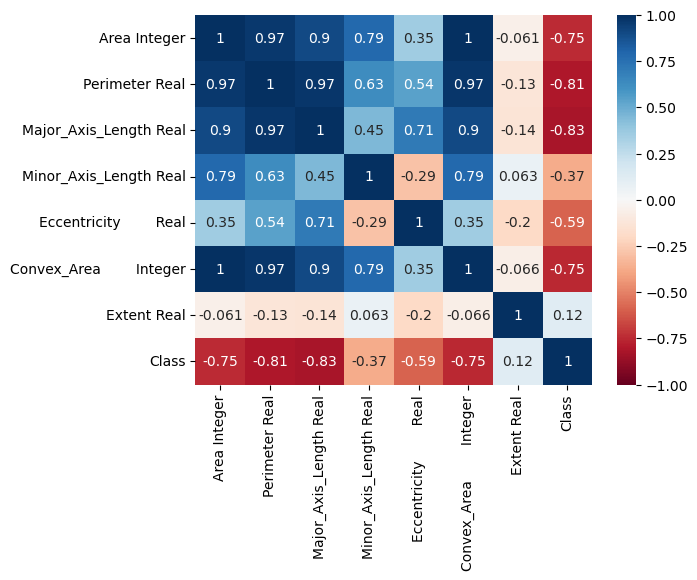

In [47]:
# Explore Feature Correlation
import seaborn as sns

data = dataset.copy().drop("id", axis = 1)
data["Class"] = pd.factorize(data["Class"])[0]
data = data.corr()
pcmp = sns.heatmap(data, vmin=-1, vmax=1, center=0, annot=True, cmap="RdBu")

In [48]:
# Select Highly Correlated Features
target = abs(data["Class"])

relevant_features = target[target > 0.5]
relevant_features

Area Integer                  0.746400
Perimeter Real                0.806572
Major_Axis_Length Real        0.827824
Eccentricity        Real      0.588916
Convex_Area        Integer    0.750424
Class                         1.000000
Name: Class, dtype: float64

In [49]:
# Update X
X = X.drop("Minor_Axis_Length Real", axis = 1)
X = X.drop("Extent Real", axis = 1)
X

,Area Integer,Perimeter Real,Major_Axis_Length Real,Eccentricity Real,Convex_Area Integer
0,0.675937,0.879232,0.901216,0.888011,0.693917
1,0.625330,0.714095,0.648087,0.691980,0.646009
2,0.623394,0.750066,0.734349,0.789846,0.635636
3,0.495071,0.524136,0.512800,0.671227,0.496220
4,0.628146,0.781992,0.709138,0.758067,0.662711
...,...,...,...,...,...
3805,0.342369,0.299758,0.269049,0.509725,0.343267
3806,0.358564,0.328975,0.239480,0.401801,0.367528
3807,0.430030,0.440458,0.408641,0.608474,0.432665
3808,0.205158,0.175325,0.169922,0.569017,0.208685


In [50]:
# Repeat Previous Process
data_train, data_test, class_train, class_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

print("The dimension for training dataset: ")
print(data_train.shape)

print("The dimension for testing dataset: ")
print(data_test.shape)

The dimension for training dataset: 
(3429, 5)
The dimension for testing dataset: 
(381, 5)


In [51]:
knn = KNeighborsClassifier()

leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p = [1,2]

hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p = p)

op_knn = GridSearchCV(knn, hyperparameters)

best_knn = op_knn.fit(data_train, class_train)

print("Best n_neighbors:", best_knn.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 9


In [52]:
k = 9

knn_9 = KNeighborsClassifier(k)

knn_9.fit(data_train, class_train)

y_pred_9 = knn_9.predict(data_test)

print("Accuracy with k = 9 for reduced model: ", accuracy_score(class_test, y_pred_9) * 100)

Accuracy with k = 9 for reduced model:  93.1758530183727
